<a href="https://colab.research.google.com/github/AnIsAsPe/Algebra_lineal-para-ML/blob/main/Vectorizaci%C3%B3n_de_texto_BOW_Expedientes_m%C3%A9dicos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocesar texto
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

#construccion de bolsa de palabras
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import itertools

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')  #WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Erick\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Funciones

#### elimina_stopwords()

In [3]:
def elimina_stopwords(texto):
    stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    nuevo_texto = stop.sub('', texto) 
    return nuevo_texto

### elimina_puntuacion()

In [4]:
def elimina_puntuacion(texto):
    nuevo_texto = re.sub('[^A-ZÜÖÄa-z0-9]+', ' ', texto)  #puntuación y todo lo que no sea letra ni números
    nuevo_texto = re.sub(" \d+", " ", nuevo_texto)   # elimina números
    return nuevo_texto

#### lematizar_ingles()

In [5]:
lemmatizer = WordNetLemmatizer()

def lematizar(texto):
    texto = texto.split()
    nuevo_texto = " ".join([lemmatizer.lemmatize(i) for i in texto])
    return nuevo_texto

#### stemmer_inglés()

In [6]:
st = PorterStemmer()

def stemmer(texto):
    texto=texto.split()
    nuevo_texto =" ".join([st.stem(i) for i in texto])
    return nuevo_texto

#### preprocesar(texto)


In [7]:
def preprocesar(texto):
    texto = texto.lower()
    texto = elimina_stopwords(texto)
    texto = elimina_puntuacion(texto)
    texto = stemmer(texto)
    return(texto)

# Lectura de datos 
[OHSUMED dataset](https://www.mat.unical.it/OlexSuite/Datasets/SampleDataSets-about.htm)




In [8]:
corpus = pd.read_csv('https://raw.githubusercontent.com/danieljfeller/medline-multilabel/master/data/processed/ohsumed_abstracts.csv', usecols=['doc'])
print(corpus.shape)
corpus.head()

(13924, 1)


,doc
0,Improved outcome at 28 days of age for very l...
1,Chylothorax after posterior spinal instrument...
2,Childhood pulmonary function following hyalin...
3,Treatment of atelectasis of upper lung lobes....
4,"Decision analysis, public health policy, and ..."


In [9]:
ejemplo = corpus['doc'][10]
print(len(ejemplo))
ejemplo

1551


" Respiratory health effects of the indoor environment in a population of Dutch children, The effect of indoor exposure to nitrogen dioxide on respiratory health was studied over a period of 2 yr in a population of nonsmoking Dutch children 6 to 12 yr of age. Lung function was measured at the schools. and information on respiratory symptoms was collected from a self-administered questionnaire completed by the parents of the children. Nitrogen dioxide was measured in the homes of all children with Palmes' diffusion tubes. In addition. information on smoking and dampness in the home was collected by questionnaire. There was no relationship between exposure to nitrogen dioxide in the home and respiratory symptoms. Respiratory symptoms were found to be associated with exposure to tobacco smoke and home dampness. There was a weak. negative association between maximal midexpiratory flow (MMEF) and exposure to nitrogen dioxide. FEV1. peak expiratory flow. and MMEF were all negatively associat

# Preprocesamiento de texto

#### Transformar texto a minúsculas

In [10]:
ejemplo = ejemplo.lower()
print(len(ejemplo))
ejemplo

1551


" respiratory health effects of the indoor environment in a population of dutch children, the effect of indoor exposure to nitrogen dioxide on respiratory health was studied over a period of 2 yr in a population of nonsmoking dutch children 6 to 12 yr of age. lung function was measured at the schools. and information on respiratory symptoms was collected from a self-administered questionnaire completed by the parents of the children. nitrogen dioxide was measured in the homes of all children with palmes' diffusion tubes. in addition. information on smoking and dampness in the home was collected by questionnaire. there was no relationship between exposure to nitrogen dioxide in the home and respiratory symptoms. respiratory symptoms were found to be associated with exposure to tobacco smoke and home dampness. there was a weak. negative association between maximal midexpiratory flow (mmef) and exposure to nitrogen dioxide. fev1. peak expiratory flow. and mmef were all negatively associat

#### Quitar puntuación

In [11]:
ejemplo = elimina_puntuacion(ejemplo)
print(len(ejemplo))
ejemplo

1523


' respiratory health effects of the indoor environment in a population of dutch children the effect of indoor exposure to nitrogen dioxide on respiratory health was studied over a period of  yr in a population of nonsmoking dutch children  to  yr of age lung function was measured at the schools and information on respiratory symptoms was collected from a self administered questionnaire completed by the parents of the children nitrogen dioxide was measured in the homes of all children with palmes diffusion tubes in addition information on smoking and dampness in the home was collected by questionnaire there was no relationship between exposure to nitrogen dioxide in the home and respiratory symptoms respiratory symptoms were found to be associated with exposure to tobacco smoke and home dampness there was a weak negative association between maximal midexpiratory flow mmef and exposure to nitrogen dioxide fev1 peak expiratory flow and mmef were all negatively associated with exposure to 

#### Quitar Palabras Irrelevantes ("Stopwords")

In [12]:
ejemplo = elimina_stopwords(ejemplo)
print(len(ejemplo))
ejemplo

1121


' respiratory health effects indoor environment population dutch children effect indoor exposure nitrogen dioxide respiratory health studied period yr population nonsmoking dutch children  yr age lung function measured schools information respiratory symptoms collected self administered questionnaire completed parents children nitrogen dioxide measured homes children palmes diffusion tubes addition information smoking dampness home collected questionnaire relationship exposure nitrogen dioxide home respiratory symptoms respiratory symptoms found associated exposure tobacco smoke home dampness weak negative association maximal midexpiratory flow mmef exposure nitrogen dioxide fev1 peak expiratory flow mmef negatively associated exposure tobacco smoke home dampness associated pulmonary function lung function growth measured period yr consistently associated indoor exposure variables development respiratory symptoms time associated indoor exposure nitrogen dioxide significant association 

## Normalización
Existen dos principales técnicas para normalizar el texto, la lematización y "radicalización" o stemming, que consiste en la  conversión de palabras en las raices

Referencia: 

https://towardsdatascience.com/introduction-to-nlp-part-2-difference-between-lemmatisation-and-stemming-3789be1c55bc

In [13]:
ejemplo = elimina_stopwords(ejemplo)
print(len(ejemplo))
ejemplo

1121


' respiratory health effects indoor environment population dutch children effect indoor exposure nitrogen dioxide respiratory health studied period yr population nonsmoking dutch children  yr age lung function measured schools information respiratory symptoms collected self administered questionnaire completed parents children nitrogen dioxide measured homes children palmes diffusion tubes addition information smoking dampness home collected questionnaire relationship exposure nitrogen dioxide home respiratory symptoms respiratory symptoms found associated exposure tobacco smoke home dampness weak negative association maximal midexpiratory flow mmef exposure nitrogen dioxide fev1 peak expiratory flow mmef negatively associated exposure tobacco smoke home dampness associated pulmonary function lung function growth measured period yr consistently associated indoor exposure variables development respiratory symptoms time associated indoor exposure nitrogen dioxide significant association 

In [14]:
ejemplo_lema = lematizar(ejemplo)
print(len(ejemplo))
ejemplo_lema

1121


'respiratory health effect indoor environment population dutch child effect indoor exposure nitrogen dioxide respiratory health studied period yr population nonsmoking dutch child yr age lung function measured school information respiratory symptom collected self administered questionnaire completed parent child nitrogen dioxide measured home child palmes diffusion tube addition information smoking dampness home collected questionnaire relationship exposure nitrogen dioxide home respiratory symptom respiratory symptom found associated exposure tobacco smoke home dampness weak negative association maximal midexpiratory flow mmef exposure nitrogen dioxide fev1 peak expiratory flow mmef negatively associated exposure tobacco smoke home dampness associated pulmonary function lung function growth measured period yr consistently associated indoor exposure variable development respiratory symptom time associated indoor exposure nitrogen dioxide significant association exposure environmental t

In [15]:
ejemplo_stem = stemmer(ejemplo)
print(len(ejemplo))
ejemplo_stem

1121


'respiratori health effect indoor environ popul dutch children effect indoor exposur nitrogen dioxid respiratori health studi period yr popul nonsmok dutch children yr age lung function measur school inform respiratori symptom collect self administ questionnair complet parent children nitrogen dioxid measur home children palm diffus tube addit inform smoke damp home collect questionnair relationship exposur nitrogen dioxid home respiratori symptom respiratori symptom found associ exposur tobacco smoke home damp weak neg associ maxim midexpiratori flow mmef exposur nitrogen dioxid fev1 peak expiratori flow mmef neg associ exposur tobacco smoke home damp associ pulmonari function lung function growth measur period yr consist associ indoor exposur variabl develop respiratori symptom time associ indoor exposur nitrogen dioxid signific associ exposur environment tobacco smoke home develop wheez also signific associ home damp develop cough'

## Todo junto

In [16]:
%%time
corpus['doc'] = corpus['doc'].apply(preprocesar)
corpus['doc'].head()

Wall time: 1min 35s


0    improv outcom day age low birth weight infant ...
1    chylothorax posterior spinal instrument fusion...
2    childhood pulmonari function follow hyalin mem...
3    treatment atelectasi upper lung lobe select br...
4    decis analysi public health polici isoniazid c...
Name: doc, dtype: object

In [17]:
# Bolsa de palabras pesos TF-IDF
cv = TfidfVectorizer(min_df=75)   #eliminando palabras muy poco frecuentes en los documentos "cut-off"
mdt_tfidf = cv.fit_transform(corpus['doc']) 
palabras = cv.get_feature_names()
bow_tfidf = pd.DataFrame(mdt_tfidf.todense(), columns=palabras)
print(bow_tfidf.shape)
bow_tfidf

(13924, 1971)


,abdomin,abil,abl,abnorm,abscess,absenc,absent,absolut,absorpt,abstract,...,would,wound,year,yet,yield,york,young,younger,yr,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058759,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.071734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.153178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.046891,0.0,0.0,0.0,0.090192,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13920,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13921,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.097269,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [20]:
words=[]
for i in corpus.doc:
    words.append(nltk.word_tokenize(i))

In [21]:
words = list(itertools.chain(*words))

In [22]:
term, freq = np.unique(words, return_counts=True)
sort = np.argsort(freq)
term = term[sort]
freq = freq[sort]

<AxesSubplot:>

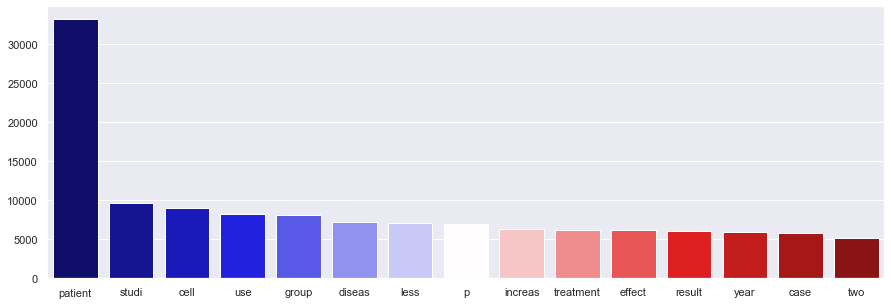

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x=term[-15:][::-1], y=freq[-15:][::-1], palette='seismic')